In [1]:
%matplotlib inline

import numpy as np
from astropy import modeling

import scipy.stats as stats

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
import pandas as pd

# C:\Users\Chase Wallace\Documents\1Stony Brook\First Year\Spring\Grad Lab 515\Doppler Free\Data\New File Names\FabryPerotCalibration\FP Signal.CSV

FullData = pd.read_csv (r'C:\Users\Chase Wallace\Documents\1Stony Brook\First Year\Spring\Grad Lab 515\Doppler Free\Data\New File Names\FabryPerotCalibration\FP Signal.CSV')

FPDataRaw = pd.DataFrame(FullData, columns= ['FP Signal'])
TriDataRaw = pd.DataFrame(FullData, columns= ['Triangle'])

FPData = np.resize(FPDataRaw,(4000,1))
TriData = np.resize(TriDataRaw,(4000,1))

# Slicing off parts we dont want
FPData = FPData[1001:3001,:]
TriData = TriData[1001:3001,:]

# Making the array 1D
FPData = FPData[:,0]
TriData = TriData[:,0]

# Scaling Stuff
FPVertScale = 1. #Volts
FPVertPos = -2.24  #Volts
FPDataScaled = FPData * FPVertScale + FPVertPos

TriVertScale = 0.05 #Volts
TriVertPos = 0.042  #Volts
TriDataScaled = TriData * TriVertScale + TriVertPos

# print (FullData)
# print (FPDataScaled)



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


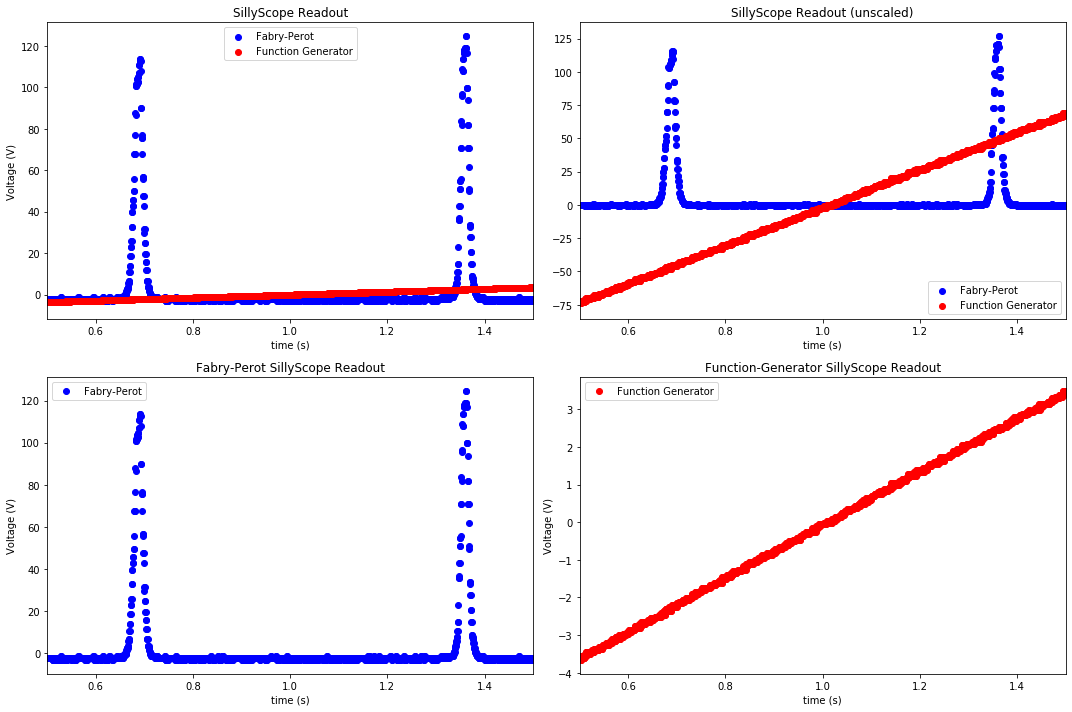

In [2]:
t_start = 0.5
t_end = 1.5
delta_t = 0.0005
t_pts = np.arange(t_start, t_end, delta_t)

t_pts.shape = (2000,) #maybe delete?

fig = plt.figure(figsize=(15,10))
Fullplt = fig.add_subplot(2,2,1)
Fullplt.scatter(t_pts, FPDataScaled, label='Fabry-Perot', color='blue')
Fullplt.scatter(t_pts, TriDataScaled, label='Function Generator', color='red')
Fullplt.set_xlim(0.5,1.5)
Fullplt.set_xlabel("time (s)")
Fullplt.set_ylabel('Voltage (V)')
Fullplt.set_title('SillyScope Readout')
Fullplt.legend();

Fuplt = fig.add_subplot(2,2,2)
Fuplt.scatter(t_pts, FPData, label='Fabry-Perot', color='blue')
Fuplt.scatter(t_pts, TriData, label='Function Generator', color='red')
Fuplt.set_xlim(0.5,1.5)
Fuplt.set_xlabel("time (s)")
Fuplt.set_ylabel('')
Fuplt.set_title('SillyScope Readout (unscaled)')
Fuplt.legend();

FPplt = fig.add_subplot(2,2,3)
FPplt.scatter(t_pts, FPDataScaled, label='Fabry-Perot', color='blue')
FPplt.set_xlim(0.5,1.5)
FPplt.set_xlabel("time (s)")
FPplt.set_ylabel('Voltage (V)')
FPplt.set_title('Fabry-Perot SillyScope Readout')
FPplt.legend();

Triplt = fig.add_subplot(2,2,4)
Triplt.scatter(t_pts, TriDataScaled, label='Function Generator', color='red')
Triplt.set_xlim(0.5,1.5)
Triplt.set_xlabel("time (s)")
Triplt.set_ylabel('Voltage (V)')
Triplt.set_title('Function-Generator SillyScope Readout')
Triplt.legend();


fig.tight_layout()

In [3]:
TriGuess = [4, -8]
FPGuess = [-3.7, 131.2, 805, .67, .68]

def LinearFunc(t, a, b):
    return a * t + b

def AiryFunc(t, B, A, F, T, t0):
    return B + A / ( 1 + F * (np.sin( (np.pi/T)*(t-t0) ))**2 )

def ChiSquared(Observed, Expected):    
    return sum( (Observed - Expected)**2 / Expected )

Slope         =  7.079388869811701 +/- 0.0026408029195947548
t=0 intercept = -7.150569022593858 +/- 0.002748000499643745
Chi Squared   = -0.45647433785661407
1.0


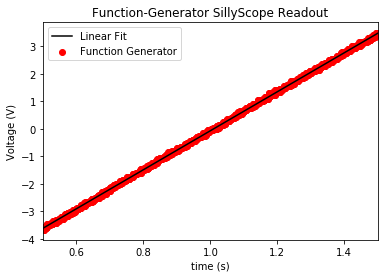

In [4]:
TriParam, TriParam_cov = curve_fit(LinearFunc, t_pts, TriDataScaled, TriGuess, maxfev=150000)
print("Slope         =  " + str(TriParam[0]) + " +/- " + str(np.sqrt(TriParam_cov[0,0])) )
print("t=0 intercept = " +  str(TriParam[1]) + " +/- " + str(np.sqrt(TriParam_cov[1,1])) )

ChiSqStat, PVal = stats.chisquare(TriDataScaled, LinearFunc(t_pts, *TriParam))

print("Chi Squared   = " + str(ChiSqStat))
print( str(PVal) )

fig = plt.figure()
Triplt = fig.add_subplot(1,1,1)
Triplt.scatter(t_pts, TriDataScaled, label='Function Generator', color='red')
Triplt.plot(t_pts, LinearFunc(t_pts, *TriParam), label='Linear Fit', color='black')
Triplt.set_xlim(0.5,1.5)
Triplt.set_xlabel("time (s)")
Triplt.set_ylabel('Voltage (V)')
Triplt.set_title('Function-Generator SillyScope Readout')
Triplt.legend();

0: Background
1: Amplitude
2: Finness
3: Period
4: t0
0 = -3.7652446145136773 +/- 0.08534466691991185
1 = 131.23722916219288 +/- 0.7107723873887778
2 = 805.0953413544463 +/- 12.956958839607005
3 = 0.6711839117972759 +/- 8.160658936761297e-05
4 = 0.6880495757406755 +/- 5.7704566511010454e-05


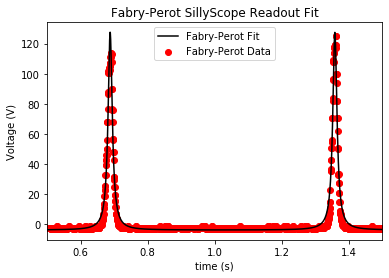

In [5]:
FPParam, FPParam_cov = curve_fit(AiryFunc, t_pts, FPDataScaled, FPGuess, maxfev=150000)
#print(FPParam)
#print(FPParam_cov)

print("0: Background")
print("1: Amplitude")
print("2: Finness")
print("3: Period")
print("4: t0")

i = 0
while i < 5:
    print(str(i) + " = " + str(FPParam[i]) + " +/- " + str(np.sqrt(FPParam_cov[i,i])) )
    i += 1

fig = plt.figure()

FPplt = fig.add_subplot(1,1,1)
FPplt.scatter(t_pts, FPDataScaled, label='Fabry-Perot Data', color='red')
FPplt.plot(t_pts, AiryFunc(t_pts, *FPParam), label='Fabry-Perot Fit', color='black')
FPplt.set_xlim(0.5,1.5)
FPplt.set_xlabel("time (s)")
FPplt.set_ylabel('Voltage (V)')
FPplt.set_title('Fabry-Perot SillyScope Readout Fit')
FPplt.legend();